<a href="https://colab.research.google.com/github/Zeaxanthin80/CAI2840C/blob/main/Assignments/Assignment_5_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 (Week 4)

## Assignment: Video Processing and Contour Detection Using OpenCV

reference:  https://colab.research.google.com/drive/1_FGt6GyViY1BAK2dIpf5DFjpH79zBV5E?usp=sharingLinks

**Objective:**

In this assignment, you will gain hands-on experience with OpenCV by building three applications in a Google Colab notebook:

1. **Video I/O Application:** Read from and write to a video stream. You can modify or extend the code we used in class.
2. **Motion Detection Application:** Develop a motion detection system that explains the concepts of foreground mass (the difference between the background model and the current frame) and erosion (a morphological operation used to remove noise). You should demonstrate erosion on a new video clip.
3. **Contour Detection Application:** Write code that identifies and draws contours on an image. For extra credit, extend your solution to detect and draw contours in a video (with a clip that is less than one minute long).

## Part 1: Video I/O Application

**Requirements:**

- **Input:** Use any video file of your choice (or create one, e.g., using your webcam or a synthetic video clip that is less than 1 minute long).
- **Processing:** Implement a simple transformation on each frame (this can be as basic as converting to grayscale, overlaying text, or drawing shapes).
- **Output:** Write the processed frames to a new video file.

**Instructions:**

1. **Reading the Video:**
    - Use cv2.VideoCapture to open the video file.
    - Loop through each frame and perform your processing.
2. **Processing the Frames:**
    - Apply your chosen transformation (for example, add a timestamp overlay or convert to grayscale).
3. **Writing the Video:**
    - Use cv2.VideoWriter to create an output video file.
    - Write the processed frames to this file.

Hint: Ensure your output video settings (frame size, codec, and frame rate) match the input video.

In [47]:
!pip install moviepy
!pip install imageio_ffmpeg

In [48]:
# First cell: Video Display
# This cell demonstrates how to load and display a video using MoviePy

# Import VideoFileClip from moviepy.editor - this class handles video file operations
# VideoFileClip can read various video formats and provides methods for video manipulation
from moviepy.editor import VideoFileClip # import VideoFileClip from moviepy.editor
from IPython.display import display, Video

# Specify the path to the input video file
# The video is located in the Visuals directory, one level up from current directory
input_video = '/content/Visuals/Main.mp4'

# Load the video file into a VideoFileClip object
# This creates a clip object that can be manipulated and displayed
clip = VideoFileClip(input_video)

# The display() function comes from IPython.display module and is specifically designed
# for Jupyter notebooks to render rich media content

# Video() is a class from IPython.display that creates an HTML5 video player widget
# Parameters:
#   - input_video: Path to the video file that will be displayed
#   - width=600: Sets the width of the video player to 600 pixels
#                The height will adjust automatically to maintain aspect ratio

# When this line executes:
# 1. The Video class loads the video file from the specified path
# 2. Creates an HTML5 video player element
# 3. The display() function renders the GOAT performing the most famous dunk of all time
#    in this video player in the notebook output cell
# display(Video(input_video, width=600))

clip.ipython_display(width = 600)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



t:  97%|█████████▋| 240/247 [00:01<00:00, 174.14it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/Visuals/Main.mp4, 691200 bytes wanted but 0 bytes read,at frame 246/247, at time 8.21/8.21 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [49]:
source = '/content/Visuals/Main.mp4'  # source = 0 for webcam

video_cap = cv2.VideoCapture(source)
if (video_cap.isOpened()== False):
  print("Error opening video stream or file")

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

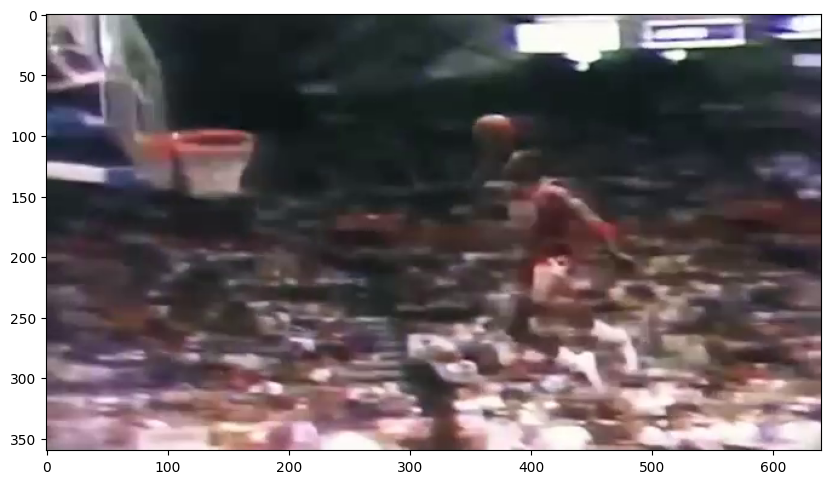

In [51]:
video_cap.set(cv2.CAP_PROP_POS_MSEC, 5750)  # 5750 milliseconds = 5.75 seconds
ret, frame = video_cap.read()
plt.figure(figsize = (10, 8))
plt.imshow(frame[...,::-1])

In [54]:
# Part 1: Video I/O Application

# Define the paths for input and output videos
# We'll read from Main.mp4 and create a grayscale version as output
input_video_path = '/content/Visuals/Main.mp4'
output_video_path = '/content/Visuals/Output_Main_Grayscale.mp4'

# Initialize video capture object to read from the input video file
# cv2.VideoCapture() creates a video capture object that can read frames from a video
cap = cv2.VideoCapture(input_video_path)

# Extract important video properties that we'll need for the output video
# CAP_PROP_FRAME_WIDTH/HEIGHT: Get the dimensions of each video frame
# CAP_PROP_FPS: Get the frames per second of the input video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

# Set up the video writer object to save the processed frames
# fourcc: Four character code that specifies the video codec (mp4v for MP4 format)
# isColor=False because we're writing grayscale frames
fourcc = cv2.VideoWriter_fourcc(*'XVID')
frame_fps = int(frame_rate/3)
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height), isColor=False)

# Main processing loop: read frames, convert to grayscale, and write to output
while cap.isOpened():
    # Read a single frame from the video
    # ret: Boolean indicating if frame was successfully read
    # frame: The actual image data of the frame
    ret, frame = cap.read()
    if not ret:
        # Break the loop if we've reached the end of the video
        break

    # Convert the frame from BGR color space to grayscale
    # OpenCV reads images in BGR (Blue-Green-Red) format by default
    # cv2.COLOR_BGR2GRAY converts from BGR color space to single-channel grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Write the processed grayscale frame to the output video
    out.write(gray_frame)

# Clean up: release video capture and writer objects
# This properly closes the files and frees up system resources
cap.release()
out.release()
# # Close any OpenCV windows that might have been opened
# # cv2.destroyAllWindows()

In [55]:
clip = VideoFileClip(output_video_path)
clip.ipython_display(width = 600)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Part 2: Motion Detection Application with Foreground Mass and Erosion

**Requirements:**

- **Input:** Use a video clip (less than one minute long) that shows some movement.
- **Processing:**
    - Create a **background model** from the initial frames.
    - Compute the **foreground mass** by taking the difference between the current frame and the background model.
    - Apply **erosion** to the foreground mask to remove noise (explain how erosion removes small, isolated noise pixels).
- **Output:** Annotate the frames (e.g., draw bounding boxes around detected motion areas) and write the output to a new video file.

**Instructions:**

1. **Background Modeling & Foreground Mass:**
2. **Applying Erosion:**
3. **Annotation and Video Output:**
    - Draw bounding rectangles (or other markers) around the regions of motion detected in the eroded foreground mask.
    - Write the annotated frames to a new output video.
    
Bonus: You can include intermediate visualizations (e.g., display the raw foreground mask vs. the eroded mask) to show the effect of erosion.

## Part 3: Contour Detection Application

**Requirements:**

 - **Input:** Use an image that contains distinct shapes (or create one with simple geometric shapes).
 - **Processing:**
    - Convert the image to grayscale and threshold it to create a binary image.
    - Use cv2.findContours to detect the contours.
    - Use cv2.drawContours to overlay the detected contours on the original image.
- **Output:** Display the resulting image with contours drawn.
- **Bonus:** Extend your code to process a video stream frame-by-frame, drawing contours on each frame.

**Instructions:**

1. **Image Preprocessing:**
    - Load the image and convert it to grayscale.
    - Apply a binary threshold to segment the shapes.
2. **Contour Detection:**
    - Use cv2.findContours with appropriate retrieval and approximation modes.
    - Explain the output: a list of contours and (optionally) a hierarchy that indicates relationships between contours.
3. **Drawing the Contours:**
    - Use cv2.drawContours to overlay the detected contours onto the image.
    - Display the final image.
4. **(Bonus) Video Contour Detection:**
    - Modify your code from Part 1 to process a video.
    - For each frame, detect contours and draw them before writing the frame to an output video file.

Hint: Choose a short video clip (under one minute) to ensure quick processing and review.